**Παίρνουμε τα άρθρα από το Πρώτο Θέμα που αναφέρονται στην Κλιματική Αλλαγή**

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [ ]:
import time

from bs4 import BeautifulSoup

#driver = webdriver.Chrome()
driver.implicitly_wait(30)

# download webdriver from https://chromedriver.storage.googleapis.com/index.html?path=83.0.4103.39/
# and put the executable in /usr/local/bin


Κάνουμε αναζήτηση των άρθρων για την Κλιματική Αλλαγή

In [ ]:
try:
    SCROLL_PAUSE_TIME = 3.5
    driver.get("https://www.protothema.gr/anazitisi/?q=%CE%BA%CE%BB%CE%B9%CE%BC%CE%B1%CF%84%CE%B9%CE%BA%CE%AE%20%CE%B1%CE%BB%CE%BB%CE%B1%CE%B3%CE%AE&Order=Related")

    last_height = driver.execute_script("return document.body.scrollHeight")

    while (last_height < 42000):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        print('height:', new_height)
        if new_height == last_height:
            print('height =' , new_height)
            break
        last_height = new_height



finally:
#    driver.quit()
    print("OK")

height: 5439
height: 5439
height = 5439
OK


In [ ]:
soup = BeautifulSoup(driver.page_source, "html.parser")

In [ ]:
stories_list = []

stories = soup.find_all('div', { 'class': 'article' })

for story in stories:
    heading = story.find('h3')
    link = heading.find('a')
    date = story.find('time')
    datetime = date['datetime']

    
    story_dict = {
        'headline': heading.text,
        'url': link['href'],
        'date': datetime
    }
     
    # Πρόσθεσε το λέξικο στη λίστα
    stories_list.append(story_dict)

In [ ]:
print(len(stories_list))

20


In [ ]:
import pandas as pd
df = pd.DataFrame(stories_list)

In [ ]:
df

headline  ...                       date
0   \nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για ...  ...  2020-06-23T20:44:00+03:00
1                    \nΚλιματική αλλαγή στα Ιμαλάια\n  ...  2010-02-05T12:34:24+02:00
2                \nΗ κλιματική αλλαγή δεν περιμένει\n  ...  2020-06-01T10:10:00+03:00
3   \n«Βόμβα Έλον Μασκ»: «Ίσως ψηφίσω Τραμπ» παρά ...  ...  2020-09-30T22:34:00+03:00
4   \n«Ασφυξία» από την κλιματική αλλαγή στις λίμν...  ...  2021-06-03T06:24:13+03:00
5   \nΔράση για την κλιματική αλλαγή ζητούν οι δύο...  ...  2021-01-27T18:30:00+02:00
6   \n«The last run» - Ένας υπερμαραθώνιος 2.421 χ...  ...  2021-05-11T12:29:00+03:00
7   \n"Η κλιματική αλλαγή αυξάνει τις φυσικές κατα...  ...  2010-06-07T16:32:25+03:00
8   \nΚλιματική αλλαγή: Πώς επηρεάζει τις γυναίκες;\n  ...  2020-08-09T09:00:00+03:00
9   \nΚατάργηση της Επιτροπής για την κλιματική αλ...  ...  2010-12-02T04:41:10+02:00
10  \nΠορεία για την κλιματική αλλαγή στη Θεσσαλον...  ...  2019-11-29T20:37:00+02:00
11  \nReuters: Η κλιματική αλλαγή απειλεί την Ακρό...  ...  2019-06-26T00:24:12+03:00
12  \nΚλιματική αλλαγή:  Μανιφέστο έξι σημείων από...  ...  2019-11-05T17:44:00+02:00
13  \nΗ κλιματική αλλαγή είναι (και) οικονομικό φα...  ...  2019-07-19T06:50:26+03:00
14  \nΗ κλιματική αλλαγή απειλεί τη διεθνή ασφάλει...  ...  2011-07-21T11:14:32+03:00
15  \nΗ κλιματική αλλαγή επηρεάζει δραματικά τη με...  ...  2020-02-11T14:00:00+02:00
16     \nΝέο σήμα κινδύνου για την κλιματική αλλαγή\n  ...  2011-10-25T09:31:46+03:00
17  \nΟ διαστημικός τουρισμός επιταχύνει την κλιμα...  ...  2010-10-27T16:24:43+03:00
18           \nΗ κλιματική αλλαγή έφερε τον καύσωνα\n  ...  2012-08-05T09:17:21+03:00
19  \nΠαγκόσμια Σύνοδος Κορυφής για την κλιματική ...  ...  2010-11-17T11:17:08+02:00

[20 rows x 3 columns]

In [ ]:
df.sort_values(by='date', ascending = False)

headline  ...                       date
4   \n«Ασφυξία» από την κλιματική αλλαγή στις λίμν...  ...  2021-06-03T06:24:13+03:00
6   \n«The last run» - Ένας υπερμαραθώνιος 2.421 χ...  ...  2021-05-11T12:29:00+03:00
5   \nΔράση για την κλιματική αλλαγή ζητούν οι δύο...  ...  2021-01-27T18:30:00+02:00
3   \n«Βόμβα Έλον Μασκ»: «Ίσως ψηφίσω Τραμπ» παρά ...  ...  2020-09-30T22:34:00+03:00
8   \nΚλιματική αλλαγή: Πώς επηρεάζει τις γυναίκες;\n  ...  2020-08-09T09:00:00+03:00
0   \nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για ...  ...  2020-06-23T20:44:00+03:00
2                \nΗ κλιματική αλλαγή δεν περιμένει\n  ...  2020-06-01T10:10:00+03:00
15  \nΗ κλιματική αλλαγή επηρεάζει δραματικά τη με...  ...  2020-02-11T14:00:00+02:00
10  \nΠορεία για την κλιματική αλλαγή στη Θεσσαλον...  ...  2019-11-29T20:37:00+02:00
12  \nΚλιματική αλλαγή:  Μανιφέστο έξι σημείων από...  ...  2019-11-05T17:44:00+02:00
13  \nΗ κλιματική αλλαγή είναι (και) οικονομικό φα...  ...  2019-07-19T06:50:26+03:00
11  \nReuters: Η κλιματική αλλαγή απειλεί την Ακρό...  ...  2019-06-26T00:24:12+03:00
18           \nΗ κλιματική αλλαγή έφερε τον καύσωνα\n  ...  2012-08-05T09:17:21+03:00
16     \nΝέο σήμα κινδύνου για την κλιματική αλλαγή\n  ...  2011-10-25T09:31:46+03:00
14  \nΗ κλιματική αλλαγή απειλεί τη διεθνή ασφάλει...  ...  2011-07-21T11:14:32+03:00
9   \nΚατάργηση της Επιτροπής για την κλιματική αλ...  ...  2010-12-02T04:41:10+02:00
19  \nΠαγκόσμια Σύνοδος Κορυφής για την κλιματική ...  ...  2010-11-17T11:17:08+02:00
17  \nΟ διαστημικός τουρισμός επιταχύνει την κλιμα...  ...  2010-10-27T16:24:43+03:00
7   \n"Η κλιματική αλλαγή αυξάνει τις φυσικές κατα...  ...  2010-06-07T16:32:25+03:00
1                    \nΚλιματική αλλαγή στα Ιμαλάια\n  ...  2010-02-05T12:34:24+02:00

[20 rows x 3 columns]

In [ ]:
df.tail()

headline  ...                       date
15  \nΗ κλιματική αλλαγή επηρεάζει δραματικά τη με...  ...  2020-02-11T14:00:00+02:00
16     \nΝέο σήμα κινδύνου για την κλιματική αλλαγή\n  ...  2011-10-25T09:31:46+03:00
17  \nΟ διαστημικός τουρισμός επιταχύνει την κλιμα...  ...  2010-10-27T16:24:43+03:00
18           \nΗ κλιματική αλλαγή έφερε τον καύσωνα\n  ...  2012-08-05T09:17:21+03:00
19  \nΠαγκόσμια Σύνοδος Κορυφής για την κλιματική ...  ...  2010-11-17T11:17:08+02:00

[5 rows x 3 columns]

Σώζουμε σε csv αρχείο

In [ ]:
df.to_csv("protothemaklimatikiallagi.csv", index=False)

In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
df = pd.read_csv("protothemaklimatikiallagi.csv")

In [ ]:
df.tail()

headline  ...                       date
15  \nΗ κλιματική αλλαγή επηρεάζει δραματικά τη με...  ...  2020-02-11T14:00:00+02:00
16     \nΝέο σήμα κινδύνου για την κλιματική αλλαγή\n  ...  2011-10-25T09:31:46+03:00
17  \nΟ διαστημικός τουρισμός επιταχύνει την κλιμα...  ...  2010-10-27T16:24:43+03:00
18           \nΗ κλιματική αλλαγή έφερε τον καύσωνα\n  ...  2012-08-05T09:17:21+03:00
19  \nΠαγκόσμια Σύνοδος Κορυφής για την κλιματική ...  ...  2010-11-17T11:17:08+02:00

[5 rows x 3 columns]

In [ ]:
df[1:20]

headline  ...                       date
1                    \nΚλιματική αλλαγή στα Ιμαλάια\n  ...  2010-02-05T12:34:24+02:00
2                \nΗ κλιματική αλλαγή δεν περιμένει\n  ...  2020-06-01T10:10:00+03:00
3   \n«Βόμβα Έλον Μασκ»: «Ίσως ψηφίσω Τραμπ» παρά ...  ...  2020-09-30T22:34:00+03:00
4   \n«Ασφυξία» από την κλιματική αλλαγή στις λίμν...  ...  2021-06-03T06:24:13+03:00
5   \nΔράση για την κλιματική αλλαγή ζητούν οι δύο...  ...  2021-01-27T18:30:00+02:00
6   \n«The last run» - Ένας υπερμαραθώνιος 2.421 χ...  ...  2021-05-11T12:29:00+03:00
7   \n"Η κλιματική αλλαγή αυξάνει τις φυσικές κατα...  ...  2010-06-07T16:32:25+03:00
8   \nΚλιματική αλλαγή: Πώς επηρεάζει τις γυναίκες;\n  ...  2020-08-09T09:00:00+03:00
9   \nΚατάργηση της Επιτροπής για την κλιματική αλ...  ...  2010-12-02T04:41:10+02:00
10  \nΠορεία για την κλιματική αλλαγή στη Θεσσαλον...  ...  2019-11-29T20:37:00+02:00
11  \nReuters: Η κλιματική αλλαγή απειλεί την Ακρό...  ...  2019-06-26T00:24:12+03:00
12  \nΚλιματική αλλαγή:  Μανιφέστο έξι σημείων από...  ...  2019-11-05T17:44:00+02:00
13  \nΗ κλιματική αλλαγή είναι (και) οικονομικό φα...  ...  2019-07-19T06:50:26+03:00
14  \nΗ κλιματική αλλαγή απειλεί τη διεθνή ασφάλει...  ...  2011-07-21T11:14:32+03:00
15  \nΗ κλιματική αλλαγή επηρεάζει δραματικά τη με...  ...  2020-02-11T14:00:00+02:00
16     \nΝέο σήμα κινδύνου για την κλιματική αλλαγή\n  ...  2011-10-25T09:31:46+03:00
17  \nΟ διαστημικός τουρισμός επιταχύνει την κλιμα...  ...  2010-10-27T16:24:43+03:00
18           \nΗ κλιματική αλλαγή έφερε τον καύσωνα\n  ...  2012-08-05T09:17:21+03:00
19  \nΠαγκόσμια Σύνοδος Κορυφής για την κλιματική ...  ...  2010-11-17T11:17:08+02:00

[19 rows x 3 columns]

In [ ]:
df.dtypes


headline    object
url         object
date        object
dtype: object

In [ ]:
import numpy as np
df['headline'].replace(':', np.nan, inplace=True)

In [ ]:
df.headline.astype(object)

0     \nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για ...
1                      \nΚλιματική αλλαγή στα Ιμαλάια\n
2                  \nΗ κλιματική αλλαγή δεν περιμένει\n
3     \n«Βόμβα Έλον Μασκ»: «Ίσως ψηφίσω Τραμπ» παρά ...
4     \n«Ασφυξία» από την κλιματική αλλαγή στις λίμν...
5     \nΔράση για την κλιματική αλλαγή ζητούν οι δύο...
6     \n«The last run» - Ένας υπερμαραθώνιος 2.421 χ...
7     \n"Η κλιματική αλλαγή αυξάνει τις φυσικές κατα...
8     \nΚλιματική αλλαγή: Πώς επηρεάζει τις γυναίκες;\n
9     \nΚατάργηση της Επιτροπής για την κλιματική αλ...
10    \nΠορεία για την κλιματική αλλαγή στη Θεσσαλον...
11    \nReuters: Η κλιματική αλλαγή απειλεί την Ακρό...
12    \nΚλιματική αλλαγή:  Μανιφέστο έξι σημείων από...
13    \nΗ κλιματική αλλαγή είναι (και) οικονομικό φα...
14    \nΗ κλιματική αλλαγή απειλεί τη διεθνή ασφάλει...
15    \nΗ κλιματική αλλαγή επηρεάζει δραματικά τη με...
16       \nΝέο σήμα κινδύνου για την κλιματική αλλαγή\n
17    \nΟ διαστημικός τουρισμός επιταχύνει την κ

In [ ]:
def replace(val):
    return(val.replace(',',''))

In [ ]:
df['headline'] = df.apply(replace, axis=1)

In [ ]:
df.dtypes

headline    object
url         object
date        object
dtype: object

In [ ]:
import pandas as pd
%matplotlib inline
df = pd.read_csv("protothemaklimatikiallagi.csv")

In [ ]:
df

headline  ...                       date
0   \nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για ...  ...  2020-06-23T20:44:00+03:00
1                    \nΚλιματική αλλαγή στα Ιμαλάια\n  ...  2010-02-05T12:34:24+02:00
2                \nΗ κλιματική αλλαγή δεν περιμένει\n  ...  2020-06-01T10:10:00+03:00
3   \n«Βόμβα Έλον Μασκ»: «Ίσως ψηφίσω Τραμπ» παρά ...  ...  2020-09-30T22:34:00+03:00
4   \n«Ασφυξία» από την κλιματική αλλαγή στις λίμν...  ...  2021-06-03T06:24:13+03:00
5   \nΔράση για την κλιματική αλλαγή ζητούν οι δύο...  ...  2021-01-27T18:30:00+02:00
6   \n«The last run» - Ένας υπερμαραθώνιος 2.421 χ...  ...  2021-05-11T12:29:00+03:00
7   \n"Η κλιματική αλλαγή αυξάνει τις φυσικές κατα...  ...  2010-06-07T16:32:25+03:00
8   \nΚλιματική αλλαγή: Πώς επηρεάζει τις γυναίκες;\n  ...  2020-08-09T09:00:00+03:00
9   \nΚατάργηση της Επιτροπής για την κλιματική αλ...  ...  2010-12-02T04:41:10+02:00
10  \nΠορεία για την κλιματική αλλαγή στη Θεσσαλον...  ...  2019-11-29T20:37:00+02:00
11  \nReuters: Η κλιματική αλλαγή απειλεί την Ακρό...  ...  2019-06-26T00:24:12+03:00
12  \nΚλιματική αλλαγή:  Μανιφέστο έξι σημείων από...  ...  2019-11-05T17:44:00+02:00
13  \nΗ κλιματική αλλαγή είναι (και) οικονομικό φα...  ...  2019-07-19T06:50:26+03:00
14  \nΗ κλιματική αλλαγή απειλεί τη διεθνή ασφάλει...  ...  2011-07-21T11:14:32+03:00
15  \nΗ κλιματική αλλαγή επηρεάζει δραματικά τη με...  ...  2020-02-11T14:00:00+02:00
16     \nΝέο σήμα κινδύνου για την κλιματική αλλαγή\n  ...  2011-10-25T09:31:46+03:00
17  \nΟ διαστημικός τουρισμός επιταχύνει την κλιμα...  ...  2010-10-27T16:24:43+03:00
18           \nΗ κλιματική αλλαγή έφερε τον καύσωνα\n  ...  2012-08-05T09:17:21+03:00
19  \nΠαγκόσμια Σύνοδος Κορυφής για την κλιματική ...  ...  2010-11-17T11:17:08+02:00

[20 rows x 3 columns]

In [ ]:
df.index

RangeIndex(start=0, stop=20, step=1)

In [ ]:
df.dtypes

headline    object
url         object
date        object
dtype: object

In [ ]:
pd.to_datetime(df.date).head()

0    2020-06-23 20:44:00+03:00
1    2010-02-05 12:34:24+02:00
2    2020-06-01 10:10:00+03:00
3    2020-09-30 22:34:00+03:00
4    2021-06-03 06:24:13+03:00
Name: date, dtype: object

In [ ]:
%%time
pd.to_datetime(df.date).head() 

CPU times: user 5 ms, sys: 0 ns, total: 5 ms
Wall time: 6.28 ms


0    2020-06-23 20:44:00+03:00
1    2010-02-05 12:34:24+02:00
2    2020-06-01 10:10:00+03:00
3    2020-09-30 22:34:00+03:00
4    2021-06-03 06:24:13+03:00
Name: date, dtype: object

In [ ]:
%%time
pd.to_datetime(df.date, format='%Y-%m-%d').head()

CPU times: user 7.95 ms, sys: 0 ns, total: 7.95 ms
Wall time: 11.4 ms


0    2020-06-23 20:44:00+03:00
1    2010-02-05 12:34:24+02:00
2    2020-06-01 10:10:00+03:00
3    2020-09-30 22:34:00+03:00
4    2021-06-03 06:24:13+03:00
Name: date, dtype: object

In [ ]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df['date']

0     2020-06-23 20:44:00+03:00
1     2010-02-05 12:34:24+02:00
2     2020-06-01 10:10:00+03:00
3     2020-09-30 22:34:00+03:00
4     2021-06-03 06:24:13+03:00
5     2021-01-27 18:30:00+02:00
6     2021-05-11 12:29:00+03:00
7     2010-06-07 16:32:25+03:00
8     2020-08-09 09:00:00+03:00
9     2010-12-02 04:41:10+02:00
10    2019-11-29 20:37:00+02:00
11    2019-06-26 00:24:12+03:00
12    2019-11-05 17:44:00+02:00
13    2019-07-19 06:50:26+03:00
14    2011-07-21 11:14:32+03:00
15    2020-02-11 14:00:00+02:00
16    2011-10-25 09:31:46+03:00
17    2010-10-27 16:24:43+03:00
18    2012-08-05 09:17:21+03:00
19    2010-11-17 11:17:08+02:00
Name: date, dtype: object

In [ ]:
df.dtypes

headline    object
url         object
date        object
dtype: object

In [ ]:
df.set_index('date' , inplace=True)

In [ ]:
df.index = pd.to_datetime(df.index, utc=True)

In [ ]:
df = df.sort_index()


In [ ]:
df['2021']

headline                                                url
date                                                                                                                           
2021-01-27 16:30:00+00:00  \nΔράση για την κλιματική αλλαγή ζητούν οι δύο...  https://www.protothema.gr/environment/article/...
2021-05-11 09:29:00+00:00  \n«The last run» - Ένας υπερμαραθώνιος 2.421 χ...  https://www.protothema.gr/life-style/article/1...
2021-06-03 03:24:13+00:00  \n«Ασφυξία» από την κλιματική αλλαγή στις λίμν...  https://www.protothema.gr/environment/article/...

In [ ]:
df['2021'].head()

headline                                                url
date                                                                                                                           
2021-01-27 16:30:00+00:00  \nΔράση για την κλιματική αλλαγή ζητούν οι δύο...  https://www.protothema.gr/environment/article/...
2021-05-11 09:29:00+00:00  \n«The last run» - Ένας υπερμαραθώνιος 2.421 χ...  https://www.protothema.gr/life-style/article/1...
2021-06-03 03:24:13+00:00  \n«Ασφυξία» από την κλιματική αλλαγή στις λίμν...  https://www.protothema.gr/environment/article/...

In [ ]:
df[df.index.month == 6]

headline                                                url
date                                                                                                                           
2010-06-07 13:32:25+00:00  \n"Η κλιματική αλλαγή αυξάνει τις φυσικές κατα...  https://www.protothema.gr/environment/article/...
2019-06-25 21:24:12+00:00  \nReuters: Η κλιματική αλλαγή απειλεί την Ακρό...  https://www.protothema.gr/greece/article/90279...
2020-06-01 07:10:00+00:00               \nΗ κλιματική αλλαγή δεν περιμένει\n  https://www.protothema.gr/afieromata/oloi-gia-...
2020-06-23 17:44:00+00:00  \nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για ...  https://www.protothema.gr/world/article/101991...
2021-06-03 03:24:13+00:00  \n«Ασφυξία» από την κλιματική αλλαγή στις λίμν...  https://www.protothema.gr/environment/article/...

In [ ]:
df[df.index.month.isin([5,6])]

headline                                                url
date                                                                                                                           
2010-06-07 13:32:25+00:00  \n"Η κλιματική αλλαγή αυξάνει τις φυσικές κατα...  https://www.protothema.gr/environment/article/...
2019-06-25 21:24:12+00:00  \nReuters: Η κλιματική αλλαγή απειλεί την Ακρό...  https://www.protothema.gr/greece/article/90279...
2020-06-01 07:10:00+00:00               \nΗ κλιματική αλλαγή δεν περιμένει\n  https://www.protothema.gr/afieromata/oloi-gia-...
2020-06-23 17:44:00+00:00  \nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για ...  https://www.protothema.gr/world/article/101991...
2021-05-11 09:29:00+00:00  \n«The last run» - Ένας υπερμαραθώνιος 2.421 χ...  https://www.protothema.gr/life-style/article/1...
2021-06-03 03:24:13+00:00  \n«Ασφυξία» από την κλιματική αλλαγή στις λίμν...  https://www.protothema.gr/environment/article/...

**ΑΝΑΛΥΣΗ TWEETS ΑΠΟ ΤΟ ΠΡΟΦΙΛ ΤΗΣ GREENPEACE**

In [ ]:
!pip install Twython
import pandas as pd
import numpy as np 
from twython import Twython

CONSUMER_KEY = ""
CONSUMER_SECRET = ""
OAUTH_TOKEN = ""
OAUTH_TOKEN_SECRET = ""
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [ ]:
tweetsL = []
try:
    user_timeline = twitter.get_user_timeline(screen_name='greenpeace_gr',count=100, tweet_mode = 'extended'  )
except TwythonError as e:
    print("Error getting tweets:", e)
print("I Got:", len(user_timeline), " tweets")
for tweet in user_timeline:
    # Add whatever you want from the tweet, here we just add the text
    tweetsL.append(tweet)

I Got: 100  tweets


In [ ]:
# Count could be less than 200, see:
# https://dev.twitter.com/discussions/7513
while len(user_timeline) != 0: 
    try:
        user_timeline = twitter.get_user_timeline(screen_name='greenpeace_gr',count=100,
                                                  tweet_mode = 'extended', max_id=user_timeline[len(user_timeline)-1]['id']-1)
    except TwythonError as e:
        print("Error getting tweets:", e)
    if len(user_timeline) > 0:
        print("I Got:", len(user_timeline), " tweets more... Last ID:", user_timeline[len(user_timeline)-1]['id']-1)
    for tweet in user_timeline:
        # Add whatever you want from the tweet, here we just add the text
        tweetsL.append(tweet)
# Number of tweets the user has made
print("I got :", len(tweetsL), " in total!!!")

I Got: 100  tweets more... Last ID: 1388752868161703937
I Got: 100  tweets more... Last ID: 1377585282380406784
I Got: 100  tweets more... Last ID: 1369215129204703237
I Got: 100  tweets more... Last ID: 1358488474706472969
I Got: 100  tweets more... Last ID: 1331269562793398271
I Got: 100  tweets more... Last ID: 1288830899237212160
I Got: 100  tweets more... Last ID: 1246069263615442944
I Got: 100  tweets more... Last ID: 1230112441654284288
I Got: 100  tweets more... Last ID: 1220662529581445120
I Got: 100  tweets more... Last ID: 1209428506129551360
I Got: 100  tweets more... Last ID: 1201214476529360902
I Got: 100  tweets more... Last ID: 1193181460464836607
I Got: 100  tweets more... Last ID: 1184891950815686655
I Got: 100  tweets more... Last ID: 1171338870744649729
I Got: 100  tweets more... Last ID: 1158316717224763391
I Got: 100  tweets more... Last ID: 1148653353104216064
I Got: 100  tweets more... Last ID: 1139433904736264193
I Got: 100  tweets more... Last ID: 113089619863

In [ ]:
len(tweetsL)

3249

In [ ]:
for tweet in tweetsL:
    print(tweet['created_at'],tweet['full_text'])

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.

Για να πετύχουμε μία δυνατή Συνθήκη για τους Ωκεανούς από τον ΟΗΕ, χρειαζόμαστε κι εσένα!

👉 https://t.co/Zep66NrZpS https://t.co/PGGiFUg4qc
Sat May 22 07:20:00 +0000 2021 Παρκόσμια Ημέρα Βιοποικιλότητας σήμερα. #WorldBiodiversityDay

Έλα μαζί μας για να προστατεύσουμε τη φύση και τους εαυτούς μας👉 https://t.co/H2WkKw6FbR

#GreenAndJustRecovery #Greenpeace https://t.co/N1W4gS6dV9
Fri May 21 13:01:07 +0000 2021 Στην Ελλάδα είναι βασική προτεραιότητα η αντιμετώπιση της κλιματικής αλλαγής, εξαιτίας του πόσο ευάλωτη είναι η χώρα στις επιπτώσεις της, είπε η Jennifer Morgan @climatemorgan στο @delphi_forum. 

#delphiforum #Greenpeace @Greenpeace

https://t.co/3o5VGWQuTd
Thu May 20 10:35:44 +0000 2021 👏👏👏 @GreenpeaceUK 

#BreakFreeFromPlastic

https://t.co/nNNoH0B7oQ
Thu May 20 09:50:48 +0000 2021 Ο γενικός διευθυντής του γραφείου μας, Νίκος Χαραλαμπίδης, γράφει στο @News247gr για την "κανονικότητα" στην οποία επιστρέφουμε και για τις απ

In [ ]:
tweetsL[30]['full_text']

'H θάλασσα δεν ειναι χωματερή και πρέπει να την προσέχουμε. Για να μην έχουμε τέτοια φαινόμενα, είναι σημαντικό να στραφούμε άμεσα στη βιώσιμη γεωργία, που δεν χρησιμοποιεί χημικά λιπάσματα που μετά καταλήγουν στις θάλασσές μας.\n\nhttps://t.co/Eik52paPvW'

In [ ]:
tweetsL[500]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Sun Feb 07 13:39:48 +0000 2021',
 'display_text_range': [0, 169],
 'entities': {'hashtags': [{'indices': [154, 169], 'text': 'Sustainability'}],
  'media': [{'display_url': 'pic.twitter.com/4ebjQeZKXV',
    'expanded_url': 'https://twitter.com/greenpeace_gr/status/1358410131936010241/photo/1',
    'id': 1358409762216562689,
    'id_str': '1358409762216562689',
    'indices': [170, 193],
    'media_url': 'http://pbs.twimg.com/media/EtoKe0hXUAEzPzI.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/EtoKe0hXUAEzPzI.jpg',
    'sizes': {'large': {'h': 960, 'resize': 'fit', 'w': 768},
     'medium': {'h': 960, 'resize': 'fit', 'w': 768},
     'small': {'h': 680, 'resize': 'fit', 'w': 544},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'type': 'photo',
    'url': 'https://t.co/4ebjQeZKXV'}],
  'symbols': [],
  'urls': [{'display_url': 'act.gp/3cCurcJ',
    'expanded_url': 'https://act.gp/3cCurcJ',
    'indices': 

In [ ]:
tweets_df = pd.DataFrame(tweetsL)

In [ ]:
tweets_df.head(15)

created_at  ...  retweeted_status
0   Sat Jul 03 10:02:30 +0000 2021  ...               NaN
1   Sat Jul 03 08:00:07 +0000 2021  ...               NaN
2   Sat Jul 03 07:57:12 +0000 2021  ...               NaN
3   Sat Jul 03 06:24:15 +0000 2021  ...               NaN
4   Sat Jul 03 06:24:14 +0000 2021  ...               NaN
5   Fri Jul 02 10:41:50 +0000 2021  ...               NaN
6   Thu Jul 01 05:26:37 +0000 2021  ...               NaN
7   Thu Jul 01 05:26:36 +0000 2021  ...               NaN
8   Thu Jul 01 05:26:35 +0000 2021  ...               NaN
9   Thu Jul 01 05:26:34 +0000 2021  ...               NaN
10  Thu Jul 01 05:26:32 +0000 2021  ...               NaN
11  Thu Jul 01 05:26:27 +0000 2021  ...               NaN
12  Thu Jul 01 05:26:24 +0000 2021  ...               NaN
13  Wed Jun 30 08:20:17 +0000 2021  ...               NaN
14  Wed Jun 30 08:20:16 +0000 2021  ...               NaN

[15 rows x 31 columns]

**Βρίσκουμε τη συχνότητα των post**

In [ ]:
df['headline'].value_counts()

\nAmazon: Σύσταση ταμείου 2 δισ. δολαρίων για την κλιματική αλλαγή \n                                               1
\nΚλιματική αλλαγή:  Μανιφέστο έξι σημείων από επιστήμονες\n                                                        1
\nΚλιματική αλλαγή: Πώς επηρεάζει τις γυναίκες;\n                                                                   1
\n«Ασφυξία» από την κλιματική αλλαγή στις λίμνες - Δραματική μείωση του πόσιμου νερού «τρέμουν» οι επιστήμονες\n    1
\nΚατάργηση της Επιτροπής για την κλιματική αλλαγή\n                                                                1
\nΚλιματική αλλαγή στα Ιμαλάια\n                                                                                    1
\nΔράση για την κλιματική αλλαγή ζητούν οι δύο στους τρεις πολίτες, σύμφωνα με δημοσκόπηση του ΟΗΕ\n                1
\n«The last run» - Ένας υπερμαραθώνιος 2.421 χλμ για την κλιματική αλλαγή με τον Άγη Εμμανουήλ \n                   1
\nΠαγκόσμια Σύνοδος Κορυφής για την κλιματική αλλαγή \n 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
tweets_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/greenpeace_tweets.tsv", sep='\t')

**TEXT ANALYSIS**
Εισάγουμε τα εργαλεία που θα χρησιμοποιήσουμε στο text analysis

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
full_tweets_df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/greenpeace_tweets.tsv", sep='\t')

In [ ]:
full_tweets_df.head()

Unnamed: 0  ... retweeted_status
0           0  ...              NaN
1           1  ...              NaN
2           2  ...              NaN
3           3  ...              NaN
4           4  ...              NaN

[5 rows x 32 columns]

Διαμόρφωση δεδομένων

In [ ]:
short_tweets = full_tweets_df[['created_at','full_text' ]]

In [ ]:
short_tweets = short_tweets.rename(columns={'created_at': 'date', 'full_text': 'text'} )

In [ ]:
short_tweets.head()

date                                               text
0  Sat Jul 03 10:02:30 +0000 2021  Πόσα τέτοια “ατυχήματα” ακόμη;\n\nΚάποιοι στην...
1  Sat Jul 03 08:00:07 +0000 2021  Το ατύχημα στον αγωγό εξόρυξης ορυκτού αερίου ...
2  Sat Jul 03 07:57:12 +0000 2021  Διαρροή σε υποθαλάσσιο αγωγό εξόρυξης ορυκτού ...
3  Sat Jul 03 06:24:15 +0000 2021  Για να συνεχίσουμε στην σωστή κατεύθυνση όμως,...
4  Sat Jul 03 06:24:14 +0000 2021  Από σήμερα καταργούνται στην ΕΕ 10 κοινά πλαστ...

In [ ]:
short_tweets.tail()

date                                               text
3244  Tue Sep 25 10:02:34 +0000 2018  Σήμερα στην Ινδονησία, ακτιβιστές μας σταμάτησ...
3245  Tue Sep 25 07:30:00 +0000 2018  Έχεις ακούσει ότι μειώνεται ο πληθυσμός των με...
3246  Mon Sep 24 18:00:01 +0000 2018  Οι άνθρωποι της Ηπείρου αντιστέκονται στις εξο...
3247  Mon Sep 24 14:09:55 +0000 2018  Η αξιοποίηση του ήλιου είναι η λύση για την εν...
3248  Mon Sep 24 12:05:33 +0000 2018  RT @Greenpeace: What happens in the Arctic aff...

In [ ]:
short_tweets.dtypes

date    object
text    object
dtype: object

In [ ]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day

In [ ]:
short_tweets.head()

date  ... day
0  Sat Jul 03 10:02:30 +0000 2021  ...   3
1  Sat Jul 03 08:00:07 +0000 2021  ...   3
2  Sat Jul 03 07:57:12 +0000 2021  ...   3
3  Sat Jul 03 06:24:15 +0000 2021  ...   3
4  Sat Jul 03 06:24:14 +0000 2021  ...   3

[5 rows x 5 columns]

In [ ]:
short_tweets.tail()

date  ... day
3244  Tue Sep 25 10:02:34 +0000 2018  ...  25
3245  Tue Sep 25 07:30:00 +0000 2018  ...  25
3246  Mon Sep 24 18:00:01 +0000 2018  ...  24
3247  Mon Sep 24 14:09:55 +0000 2018  ...  24
3248  Mon Sep 24 12:05:33 +0000 2018  ...  24

[5 rows x 5 columns]

In [ ]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

**Τα tweets που έχουν γίνει συνολικά ανά ημέρα**


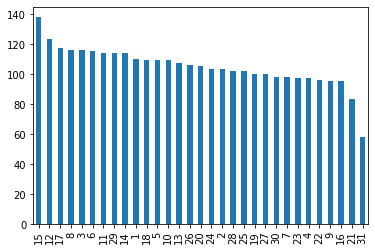

In [ ]:
short_tweets['day'].value_counts().plot(kind='bar')

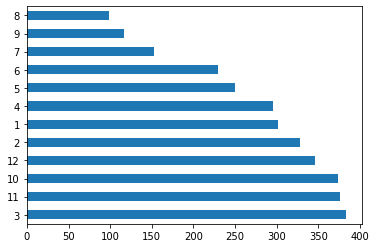

In [ ]:
short_tweets['month'].value_counts().plot(kind='barh') 


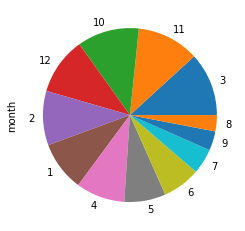

In [ ]:
short_tweets['month'].value_counts().plot(kind='pie') 


Tα πιο δημοφιλή tweets

In [ ]:
full_tweets_df.sort_values('favorite_count', ascending=False).groupby('full_text')['retweet_count','favorite_count'].first()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


retweet_count  favorite_count
full_text                                                                        
"Join us in our fight of ending fossil fuels ex...             28              92
"[...] η επόμενη ημέρα, εκτός από “πράσινη” πρέ...              0               4
"Ένα μωρό χρειάζεται τρυφερότητα και αγκαλιές",...             39              71
"Έχουμε αποθέματα άνθρακα για 200 χρόνια. Περιμ...              3               7
"Όπως αναφέρει το BBC, επί σειρά ετών περιβαλλο...              1               3
...                                                           ...             ...
🥵 ΗΡΕΜΑ ΤΟ ΛΕΜΕ: #BreakFreeFossilFuels https://...              2               4
🦉😍 #NatureIsAwesome &gt;&gt; https://t.co/0fuHr...              1               8
🧐🌿 Καλημέρα &gt;&gt; https://t.co/CcGiaFRGGy ht...              3               6
🧐😍🐠 Καλημέρα! &gt;&gt; https://t.co/WWLRZaSs99 ...              1               7
🧐😮🍄 #NatureIsAwesome &gt;&gt; https://t.co/WWLR...              2              10

[3241 rows x 2 columns]

In [ ]:
full_tweets_df.sort_values('favorite_count', ascending=False).groupby('full_text')['retweet_count','favorite_count'].first(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


retweet_count  favorite_count
full_text                                                                        
"Join us in our fight of ending fossil fuels ex...             28              92
"[...] η επόμενη ημέρα, εκτός από “πράσινη” πρέ...              0               4
"Ένα μωρό χρειάζεται τρυφερότητα και αγκαλιές",...             39              71
"Έχουμε αποθέματα άνθρακα για 200 χρόνια. Περιμ...              3               7
"Όπως αναφέρει το BBC, επί σειρά ετών περιβαλλο...              1               3
...                                                           ...             ...
🥵 ΗΡΕΜΑ ΤΟ ΛΕΜΕ: #BreakFreeFossilFuels https://...              2               4
🦉😍 #NatureIsAwesome &gt;&gt; https://t.co/0fuHr...              1               8
🧐🌿 Καλημέρα &gt;&gt; https://t.co/CcGiaFRGGy ht...              3               6
🧐😍🐠 Καλημέρα! &gt;&gt; https://t.co/WWLRZaSs99 ...              1               7
🧐😮🍄 #NatureIsAwesome &gt;&gt; https://t.co/WWLR...              2              10

[3241 rows x 2 columns]

In [ ]:
most_popular_protothema = full_tweets_df.sort_values('favorite_count', ascending=False).groupby('full_text')['retweet_count','favorite_count'].first(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
%matplotlib inline

In [ ]:
from textblob import TextBlob

blob = TextBlob("I love driving the car.")
blob.sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [ ]:
tweet = '''I am very disappointed in China. Our foolish past leaders 
have allowed them to make hundreds of billions of dollars a year in trade, yet
they do NOTHING for us with North Korea, just talk. We will no longer allow this
to continue. China could easily solve this problem!'''

In [ ]:
"I tried to fish for fish but I didn't catch any fish".count("fish")

3

In [ ]:
fish_sentence = "I tried to fish for fish but I didn't catch any fish"
fish_sentence.split(" ")

['I',
 'tried',
 'to',
 'fish',
 'for',
 'fish',
 'but',
 'I',
 "didn't",
 'catch',
 'any',
 'fish']

In [ ]:
fish_sentence = "I tried to fish for fish but I didn't catch any fish"

In [ ]:
fish_sentence = "I tried to fish for fish but I didn't catch any fish"


In [ ]:
toucan_sentence = "The canny toucan can't recant the pelican's scant canteloupe"


In [ ]:
dinner_sentence = "Dinner was great tonight, I enjoyed the potatoes."
dinner_list = dinner_sentence.split(" ")
dinner_list

['Dinner', 'was', 'great', 'tonight,', 'I', 'enjoyed', 'the', 'potatoes.']

In [ ]:
dinner_list.count("dinner")

0

In [ ]:
dinner_sentence = "Dinner was great tonight, I enjoyed the potatoes."
dinner_sentence = dinner_sentence.lower().replace(".", " ")
dinner_list = dinner_sentence.split(" ")
dinner_list

['dinner', 'was', 'great', 'tonight,', 'i', 'enjoyed', 'the', 'potatoes', '']

In [ ]:
dinner_list.count("dinner")

1

In [ ]:
import spacy
nlp = spacy.load('en')

In [ ]:
doc = nlp("The dangerous cats ran dangerously toward dangers")
tokens = [token for token in doc]
tokens

[The, dangerous, cats, ran, dangerously, toward, dangers]

In [ ]:
text = "Today I went driving to the grocery store. I hate to drive the car, but I love visiting the gas station!"


In [ ]:

doc = nlp("The dangerous cats ran dangerously toward dangers.")
tokens = [token.lemma_ for token in doc]
tokens

['the', 'dangerous', 'cat', 'run', 'dangerously', 'toward', 'danger', '.']

In [ ]:
phrases = ['i love cars', 'i hate cars', 'i butter cars', 'misery and gloomy pain cars']
for phrase in phrases:
    doc = nlp(phrase)
    print("The sentiment for", doc, "is", doc[0].sentiment)

The sentiment for i love cars is 0.0
The sentiment for i hate cars is 0.0
The sentiment for i butter cars is 0.0
The sentiment for misery and gloomy pain cars is 0.0


In [ ]:
words = ['love', 'hate', 'butter', 'misery and gloomy pain']
for word in words:
    blob = TextBlob(word)
    print("The sentiment for", word, "is", blob.sentiment)

The sentiment for love is Sentiment(polarity=0.5, subjectivity=0.6)
The sentiment for hate is Sentiment(polarity=-0.8, subjectivity=0.9)
The sentiment for butter is Sentiment(polarity=0.0, subjectivity=0.0)
The sentiment for misery and gloomy pain is Sentiment(polarity=0.0, subjectivity=0.0)


In [ ]:
phrases = ['i love cars', 
           'i hate cars', 
           'cars butter cars', 
           'misery and gloomy pain cars',
           'the cars hate butter'
          ]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vec = CountVectorizer()
matrix = vec.fit_transform(phrases)

matrix

<5x9 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
short_tweets[short_tweets['year']==2020]['text']

547                     Καλή χρονιά! Χαρούμενο 2021! 🥳🎊  
548     Μήπως έχει δίκιο ο Άγιος Βασίλης; Για να σώσου...
549     Μία χρονιά γεμάτη προκλήσεις φτάνει στο τέλος ...
550     Χωρίς τις μέλισσες δεν έχει φρούτα και λαχανικ...
551     Φέτος δεν έχουμε μία κλασική ανασκοπή της χρον...
                              ...                        
1066    Δες τη σαλάτα του μήνα! Ήξερες ότι τα εποχιακά...
1067    Εάν οι μέλισσες αφανιστούν, καρποί όπως τα μήλ...
1068    Γνωρίζεις τι σημαίνει δίκαιη αλιεία; Ή ότι στη...
1069    Από πού προέρχεται το φαγητό σου; Από ένα μικρ...
1070    Η φύση δεν σταματά να μας εμπνέει! Χρόνια  πολ...
Name: text, Length: 524, dtype: object

In [ ]:
text = short_tweets['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [ ]:
text = short_tweets[short_tweets['year']==2020]['text'].str.cat(sep = ' ').replace("amp", ' ')

In [ ]:
list(STOPWORDS)[0:20]

['i',
 'or',
 'your',
 'than',
 "he's",
 "i've",
 'yours',
 'few',
 "doesn't",
 "hasn't",
 'she',
 'both',
 "i'd",
 'and',
 "it's",
 'just',
 'him',
 'get',
 'these',
 'out']

In [ ]:
# Stop words
# Link to greek stop words: https://www.translatum.gr/forum/index.php?topic=3550.0?topic=3550.0
STOPWORDS = set(
    """
αδιάκοπα αι ακόμα ακόμη ακριβώς άλλα αλλά αλλαχού άλλες άλλη άλλην
άλλης αλλιώς αλλιώτικα άλλο άλλοι αλλοιώς αλλοιώτικα άλλον άλλος άλλοτε αλλού
άλλους άλλων άμα άμεσα αμέσως αν ανά ανάμεσα αναμεταξύ άνευ αντί αντίπερα αντίς
άνω ανωτέρω άξαφνα απ απέναντι από απόψε άρα άραγε αρκετά αρκετές
αρχικά ας αύριο αυτά αυτές αυτή αυτήν αυτής αυτό αυτοί αυτόν αυτός αυτού αυτούς
αυτών αφότου αφού
βέβαια βεβαιότατα
γι για γιατί γρήγορα γύρω
δα δε δείνα δεν δεξιά δήθεν δηλαδή δι δια διαρκώς δικά δικό δικοί δικός δικού
δικούς διόλου δίπλα δίχως
εάν εαυτό εαυτόν εαυτού εαυτούς εαυτών έγκαιρα εγκαίρως εγώ εδώ ειδεμή είθε είμαι
είμαστε είναι εις είσαι είσαστε είστε είτε είχα είχαμε είχαν είχατε είχε είχες έκαστα
έκαστες έκαστη έκαστην έκαστης έκαστο έκαστοι έκαστον έκαστος εκάστου εκάστους εκάστων
εκεί εκείνα εκείνες εκείνη εκείνην εκείνης εκείνο εκείνοι εκείνον εκείνος εκείνου
εκείνους εκείνων εκτός εμάς εμείς εμένα εμπρός εν ένα έναν ένας ενός εντελώς εντός
εναντίον  εξής  εξαιτίας  επιπλέον επόμενη εντωμεταξύ ενώ εξ έξαφνα εξήσ εξίσου έξω επάνω
επειδή έπειτα επί επίσης επομένως εσάς εσείς εσένα έστω εσύ ετέρα ετέραι ετέρας έτερες
έτερη έτερης έτερο έτεροι έτερον έτερος ετέρου έτερους ετέρων ετούτα ετούτες ετούτη ετούτην
ετούτης ετούτο ετούτοι ετούτον ετούτος ετούτου ετούτους ετούτων έτσι εύγε ευθύς ευτυχώς εφεξής
έχει έχεις έχετε έχομε έχουμε έχουν εχτές έχω έως έγιναν  έγινε  έκανε  έξι  έχοντας
η ήδη ήμασταν ήμαστε ήμουν ήσασταν ήσαστε ήσουν ήταν ήτανε ήτοι ήττον
θα
ι ιδία ίδια ίδιαν ιδίας ίδιες ίδιο ίδιοι ίδιον ίδιοσ ίδιος ιδίου ίδιους ίδιων ιδίως ιι ιιι
ίσαμε ίσια ίσως
κάθε καθεμία καθεμίας καθένα καθένας καθενός καθετί καθόλου καθώς και κακά κακώς καλά
καλώς καμία καμίαν καμίας κάμποσα κάμποσες κάμποση κάμποσην κάμποσης κάμποσο κάμποσοι
κάμποσον κάμποσος κάμποσου κάμποσους κάμποσων κανείς κάνεν κανένα κανέναν κανένας
κανενός κάποια κάποιαν κάποιας κάποιες κάποιο κάποιοι κάποιον κάποιος κάποιου κάποιους
κάποιων κάποτε κάπου κάπως κατ κατά κάτι κατιτί κατόπιν κάτω κιόλας κλπ κοντά κτλ κυρίως
λιγάκι λίγο λιγότερο λόγω λοιπά λοιπόν
μα μαζί μακάρι μακρυά μάλιστα μάλλον μας με μεθαύριο μείον μέλει μέλλεται μεμιάς μεν
μερικά μερικές μερικοί μερικούς μερικών μέσα μετ μετά μεταξύ μέχρι μη μήδε μην μήπως
μήτε μια μιαν μιας μόλις μολονότι μονάχα μόνες μόνη μόνην μόνης μόνο μόνοι μονομιάς
μόνος μόνου μόνους μόνων μου μπορεί μπορούν μπρος μέσω  μία  μεσώ με μου
να ναι νωρίς
ξανά ξαφνικά
ο οι όλα όλες όλη όλην όλης όλο ολόγυρα όλοι όλον ολονέν όλος ολότελα όλου όλους όλων
όλως ολωσδιόλου όμως όποια οποιαδήποτε οποίαν οποιανδήποτε οποίας οποίος οποιασδήποτε οποιδήποτε
όποιες οποιεσδήποτε όποιο οποιοδηήποτε όποιοι όποιον οποιονδήποτε όποιος οποιοσδήποτε
οποίου οποιουδήποτε οποίους οποιουσδήποτε οποίων οποιωνδήποτε όποτε οποτεδήποτε όπου
οπουδήποτε όπως ορισμένα ορισμένες ορισμένων ορισμένως όσα οσαδήποτε όσες οσεσδήποτε
όση οσηδήποτε όσην οσηνδήποτε όσης οσησδήποτε όσο οσοδήποτε όσοι οσοιδήποτε όσον οσονδήποτε
όσος οσοσδήποτε όσου οσουδήποτε όσους οσουσδήποτε όσων οσωνδήποτε όταν ότι οτιδήποτε
ότου ου ουδέ ούτε όχι οποία  οποίες  οποίο  οποίοι  οπότε  ος
πάνω  παρά  περί  πολλά  πολλές  πολλοί  πολλούς  που  πρώτα  πρώτες  πρώτη  πρώτο  πρώτος  πως
πάλι πάντα πάντοτε παντού πάντως πάρα πέρα πέρι περίπου περισσότερο πέρσι πέρυσι πια πιθανόν
πιο πίσω πλάι πλέον πλην ποιά ποιάν ποιάς ποιές ποιό ποιοί ποιόν ποιός ποιού ποιούς
ποιών πολύ πόσες πόση πόσην πόσης πόσοι πόσος πόσους πότε ποτέ πού πούθε πουθενά πρέπει
πριν προ προκειμένου πρόκειται πρόπερσι προς προτού προχθές προχτές πρωτύτερα πώς
σαν σας σε σεις σου στα στη στην στης στις στο στον στου στους στων συγχρόνως
συν συνάμα συνεπώς συχνάς συχνές συχνή συχνήν συχνής συχνό συχνοί συχνόν
συχνός συχνού συχνούς συχνών συχνώς σχεδόν στο
τα τάδε ταύτα ταύτες ταύτη ταύτην ταύτης ταύτοταύτον ταύτος ταύτου ταύτων τάχα τάχατε
τελευταία  τελευταίο  τελευταίος  τού  τρία  τρίτη  τρεις τελικά τελικώς τες τέτοια τέτοιαν
τέτοιας τέτοιες τέτοιο τέτοιοι τέτοιον τέτοιος τέτοιου
τέτοιους τέτοιων τη την της τι τίποτα τίποτε τις το τοι τον τοσ τόσα τόσες τόση τόσην
τόσης τόσο τόσοι τόσον τόσος τόσου τόσους τόσων τότε του τουλάχιστο τουλάχιστον τους τούς τούτα
τούτες τούτη τούτην τούτης τούτο τούτοι τούτοις τούτον τούτος τούτου τούτους τούτων τυχόν
των τώρα του
υπ υπέρ υπό υπόψη υπόψιν ύστερα
χωρίς χωριστά
ω ως ωσάν ωσότου ώσπου ώστε ωστόσο ωχ
""".split()
)

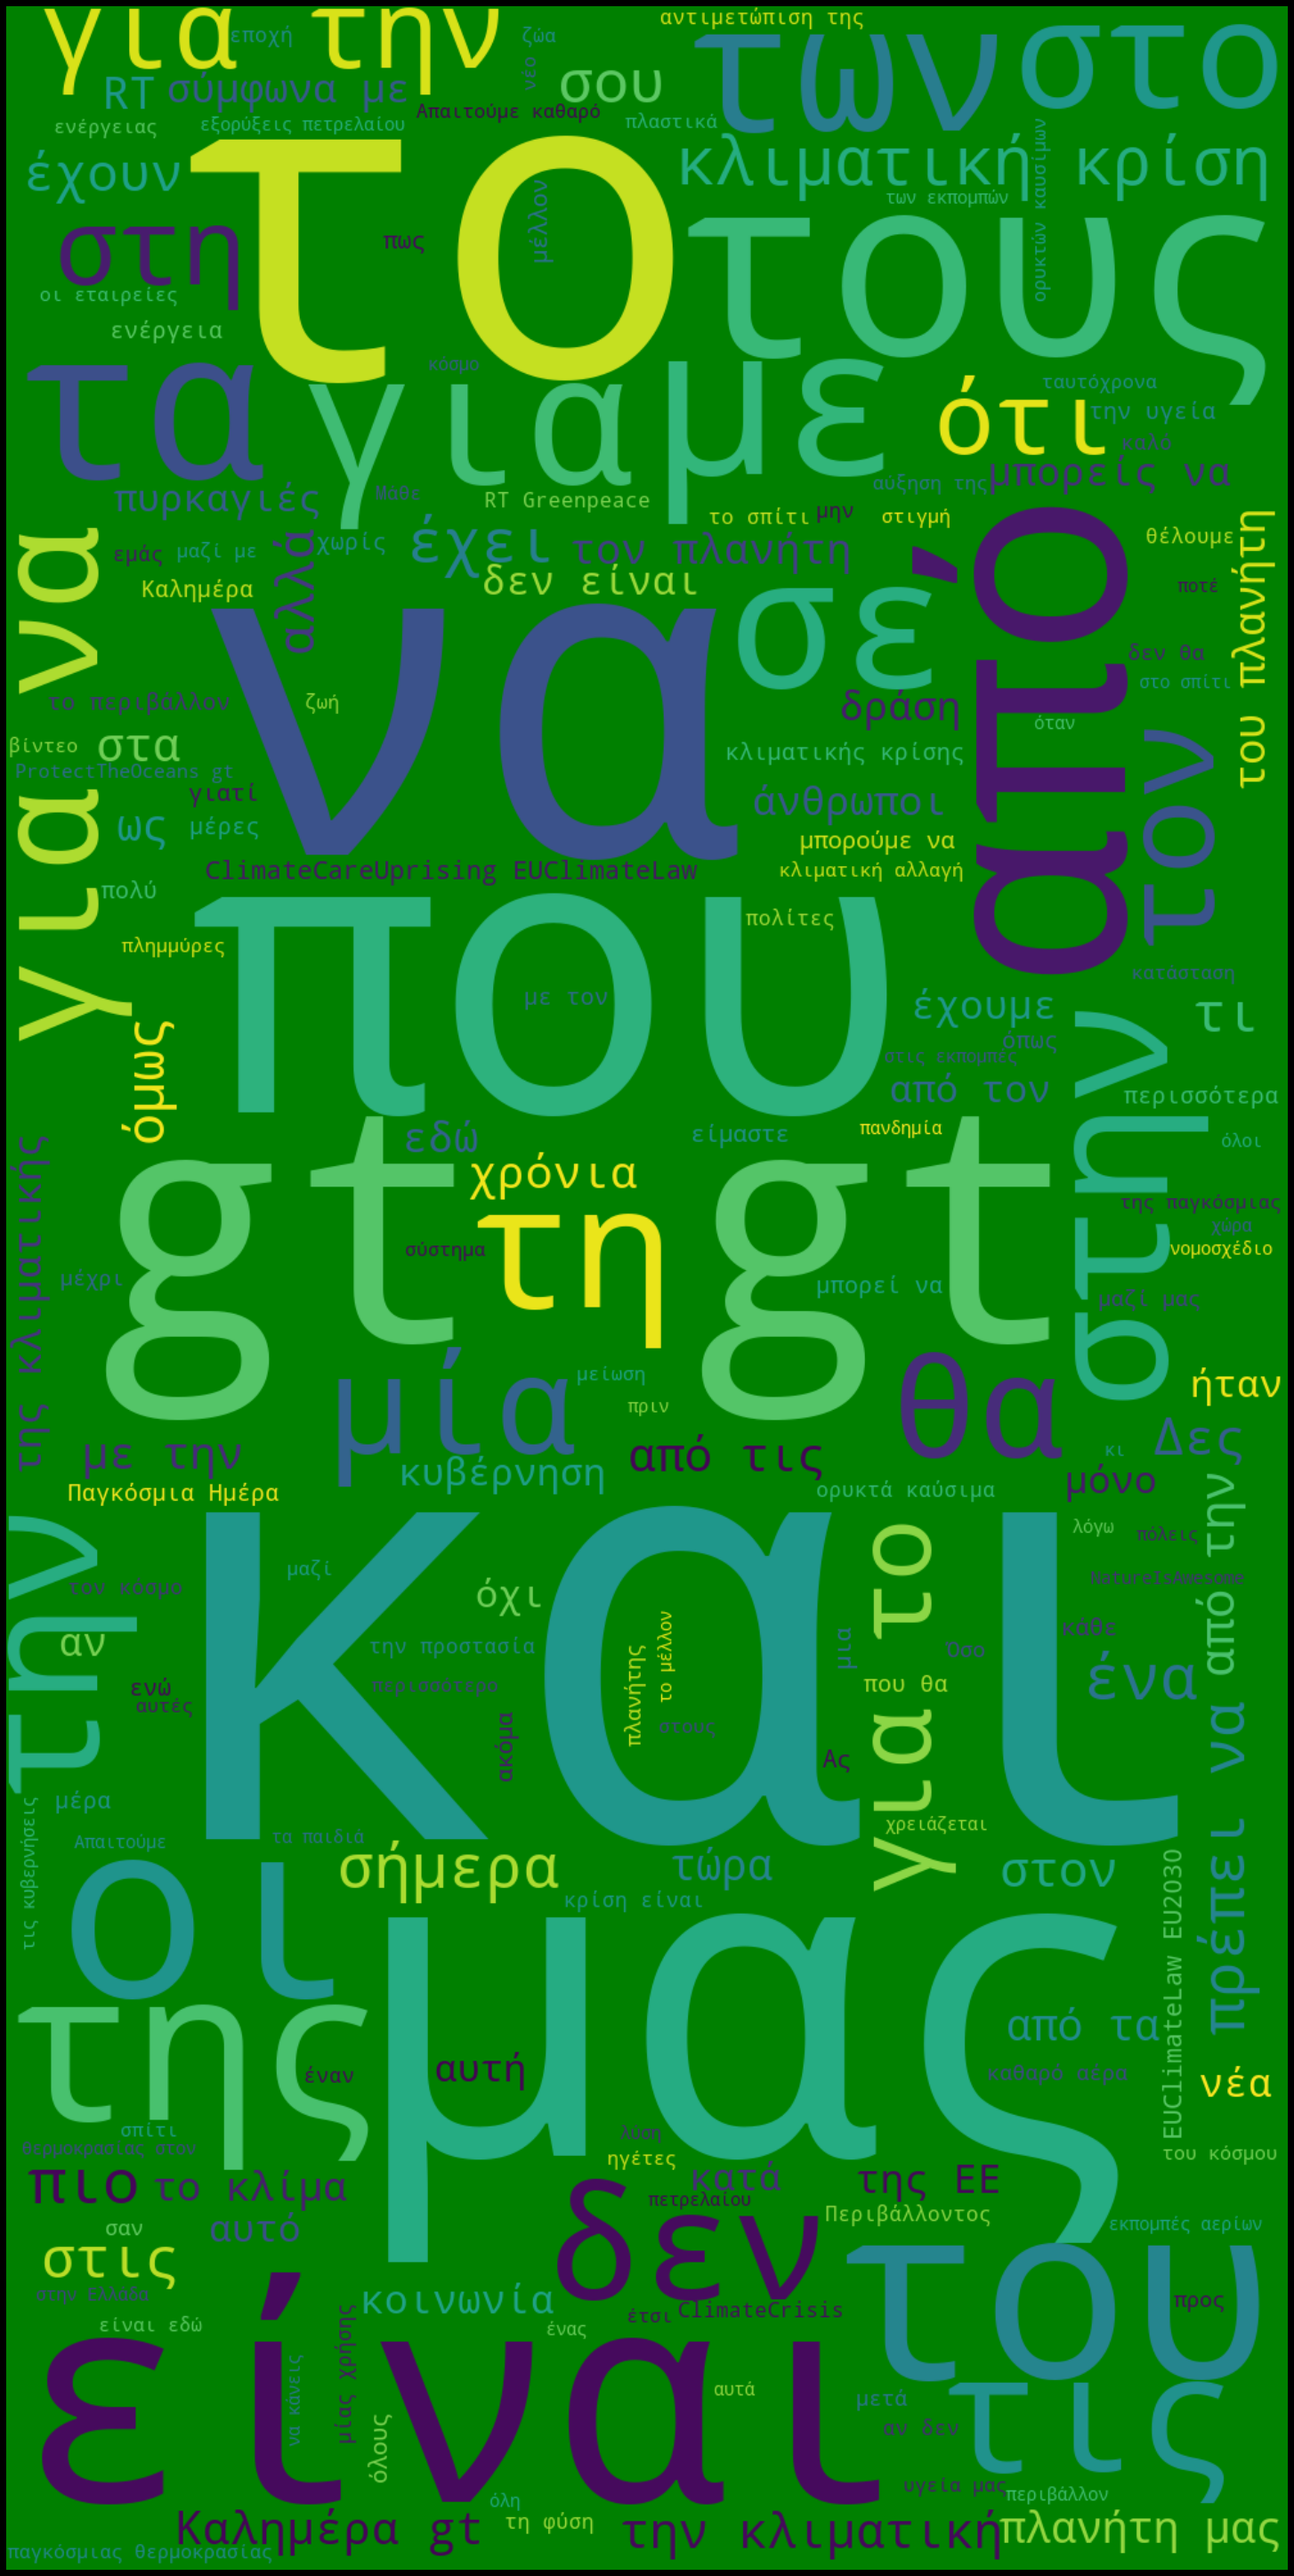

In [ ]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 1000,
    height = 2000,
    background_color = 'green'
 ).generate(text)
fig = plt.figure(
    figsize = (30, 40),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
doc = nlp(short_tweets['text'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

Το Το
ατύχημα ατύχημα
στον στον
αγωγό αγωγό
εξόρυξης εξόρυξης
ορυκτού ορυκτού
αερίου αερίου
στον στον
Κόλπο Κόλπο
του του
Μεξικού Μεξικού
δείχνει δείχνει
για για
άλλη άλλη
μία μία
φορά φορά
τον τον
κίνδυνο κίνδυνο
που που
έχουν έχουν
τα τα
ορυκτά ορυκτά
καύσιμα καύσιμα
για για
το το
περιβάλλον περιβάλλον
και και
τον τον
άνθρωπο άνθρωπο
. .


 


# #
FossilFreeRevolution fossilfreerevolution
# #
BreakFreeFromFossilFuels breakfreefromfossilfuel
   


In [ ]:
' '.join(token.lemma_ for token in doc)

'Το ατύχημα στον αγωγό εξόρυξης ορυκτού αερίου στον Κόλπο του Μεξικού δείχνει για άλλη μία φορά τον κίνδυνο που έχουν τα ορυκτά καύσιμα για το περιβάλλον και τον άνθρωπο . \n\n # fossilfreerevolution # breakfreefromfossilfuel  '

In [ ]:
text

'Καλή χρονιά! Χαρούμενο 2021! 🥳🎊   Μήπως έχει δίκιο ο Άγιος Βασίλης; Για να σώσουμε το κλίμα, ας πάρουμε την κατάσταση στα χέρια μας και ας στραφούμε στον ήλιο &gt;&gt; \n  Μία χρονιά γεμάτη προκλήσεις φτάνει στο τέλος της, όμως τώρα χρειάζεται να προστατεύσουμε τον πλανήτη μας περισσότερο από ποτέ. Μέσα από τις δυσκολίες βγαίνουμε πιο δυνατοί. Κρατάμε τις καλύτερες στιγμές και παραμένουμε συνδεδεμένοι με ό,τι έχει σημασία.   Χωρίς τις μέλισσες δεν έχει φρούτα και λαχανικά, δεν έχει τροφή για ζώα και ανθρώπους. Μάθε από τι απειλούνται οι μέλισσες και προστάτεψέ τες &gt;&gt;   Φέτος δεν έχουμε μία κλασική ανασκοπή της χρονιάς που φεύγει. Εστιάζουμε στην αισιοδοξία και την ορμή, και ετοιμάσαμε για σένα τη "wishlist" μας, αυτά που θέλουμε και ταυτόχρονα αυτά για τα οποία θα συνεχίσουμε να δουλεύουμε για να τα πετύχουμε.\n\n  Ζώα που η γούνα τους ασπρίζει, για να προετοιμαστούν για τον χειμώνα! Δες γιατί 🐇❄️😍  #NatureIsAwesome &gt;&gt;   Μπορεί λόγω πανδημίας να χρειαζόμαστε περισσότερο το

In [ ]:
full_doc = nlp(text)

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text[100:200]

'ς πάρουμε την κατάσταση στα χέρια μας και ας στραφούμε στον ήλιο & gt;&gt ; \n   μία χρονιά γεμάτη πρ'

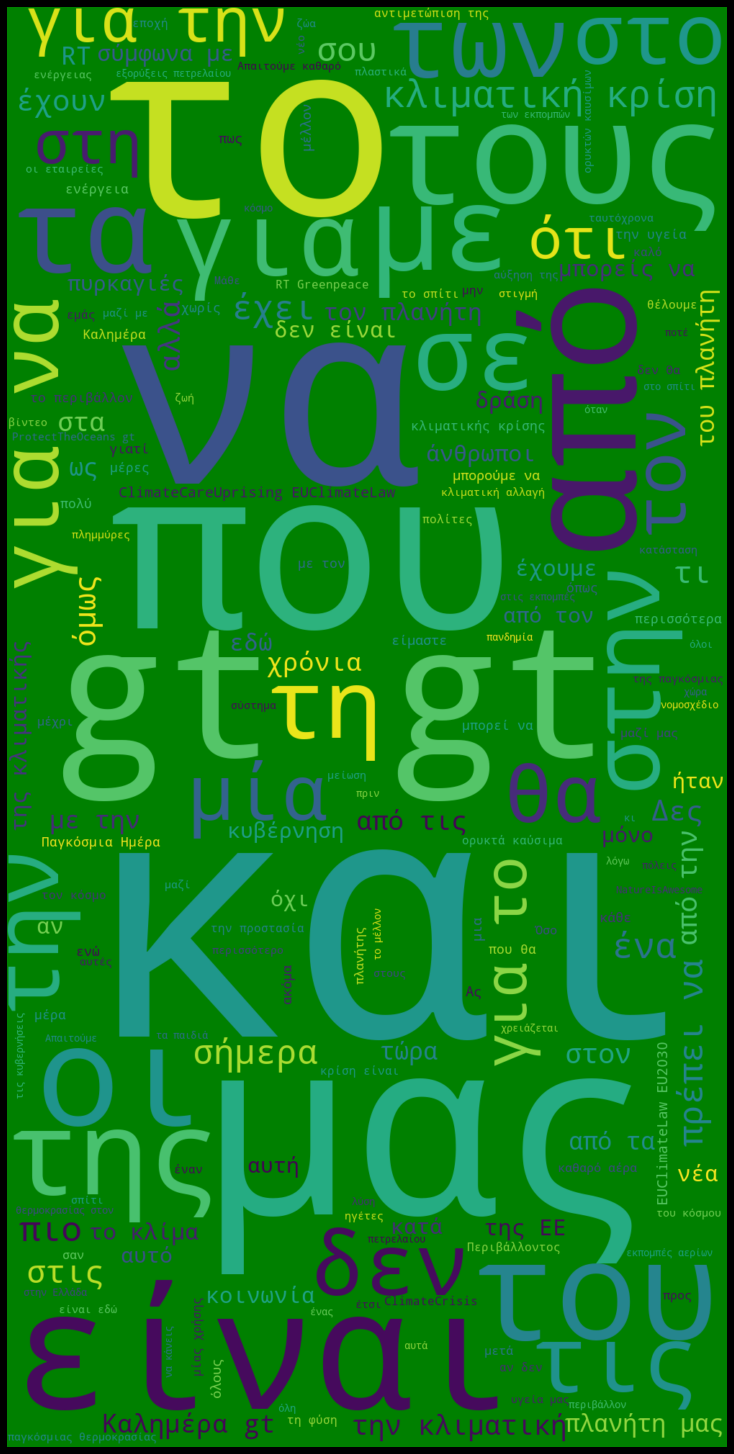

In [ ]:
Wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'red'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_vector = cv.fit_transform(short_tweets['text'])


In [ ]:
import spacy
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:10]

['οσοσδήποτε',
 'βεβαιότατα',
 'επόμενη',
 'λιγάκι',
 'ιιι',
 'όλοι',
 'πολλοί',
 'πιο',
 'κάμποσες',
 'κάμποσους']

In [ ]:
doc = nlp(short_tweets['full_text'][1])


In [ ]:
for token in doc:
    print(token, token.lemma_)

Το το
ατύχημα ατύχημα
στον στον
αγωγό αγωγό
εξόρυξης εξόρυξη
ορυκτού ορυκτός
αερίου αερίος
στον στον
Κόλπο κόλπο
του του
Μεξικού Μεξικού
δείχνει δείχνω
για για
άλλη άλλη
μία μία
φορά φορά
τον τον
κίνδυνο κίνδυνο
που που
έχουν έχω
τα τα
ορυκτά ορυκτά
καύσιμα καύσιμα
για για
το το
περιβάλλον περιβάλλον
και και
τον τον
άνθρωπο άνθρωπο
. .


 


# #
FossilFreeRevolution fossilfreerevolution
# #
BreakFreeFromFossilFuels breakfreefromfossilfuels
   


In [ ]:
' '.join(token.lemma_ for token in doc)

'το ατύχημα στον αγωγό εξόρυξη ορυκτός αερίος στον κόλπο του Μεξικού δείχνω για άλλη μία φορά τον κίνδυνο που έχω τα ορυκτά καύσιμα για το περιβάλλον και τον άνθρωπο . \n\n # fossilfreerevolution # breakfreefromfossilfuels  '

In [ ]:
full_doc = nlp(text)
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text[200:400]


'fuels    το ατύχημα στον αγωγό εξόρυξη ορυκτός αερίος στον κόλπο του Μεξικού δείχνω για άλλη μία φορά τον κίνδυνο που έχω τα ορυκτά καύσιμα για το περιβάλλον και τον άνθρωπο . \n\n # fossilfreerevolutio'

In [ ]:
count_vector.shape

(3249, 191)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 


In [ ]:
results.head()

000  10  12  20  2019  about  ...  χρόνια  χρόνο  χώρα  χώρας  ωκεανούς  ώρα
0    0   0   0   0     0      0  ...       0      0     0      0         0    0
1    0   0   0   0     0      0  ...       0      0     0      0         0    0
2    0   0   0   0     0      0  ...       0      0     0      0         0    1
3    0   0   0   0     0      0  ...       0      0     0      0         0    0
4    0   1   0   0     0      0  ...       0      0     0      0         0    0

[5 rows x 191 columns]

In [ ]:
cv.vocabulary_

{'000': 0,
 '10': 1,
 '12': 2,
 '20': 3,
 '2019': 4,
 'about': 5,
 'action': 6,
 'activists': 7,
 'actonclimate': 8,
 'all': 9,
 'amp': 10,
 'and': 11,
 'are': 12,
 'as': 13,
 'at': 14,
 'be': 15,
 'blog': 16,
 'breakfreefromplastic': 17,
 'breaking': 18,
 'but': 19,
 'by': 20,
 'can': 21,
 'change': 22,
 'climate': 23,
 'climatecrisis': 24,
 'climateemergency': 25,
 'coal': 26,
 'companies': 27,
 'eu': 28,
 'for': 29,
 'from': 30,
 'greenpeace': 31,
 'greenpeaceeu': 32,
 'greenpeaceuk': 33,
 'gt': 34,
 'has': 35,
 'have': 36,
 'if': 37,
 'in': 38,
 'is': 39,
 'it': 40,
 'just': 41,
 'like': 42,
 'more': 43,
 'natureisawesome': 44,
 'ncharalamb': 45,
 'need': 46,
 'new': 47,
 'noplastic': 48,
 'not': 49,
 'now': 50,
 'of': 51,
 'oil': 52,
 'on': 53,
 'one': 54,
 'our': 55,
 'people': 56,
 'peoplevsoil': 57,
 'plastic': 58,
 'protecttheoceans': 59,
 're': 60,
 'rt': 61,
 'that': 62,
 'the': 63,
 'this': 64,
 'to': 65,
 'today': 66,
 'we': 67,
 'what': 68,
 'will': 69,
 'with': 70,
 'wor

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(short_tweets['full_text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  10  12  20  2019  about  ...  χρόνια  χρόνο  χώρα  χώρας  ωκεανούς  ώρα
0    0   0   0   0     0      0  ...       0      0     0      0         0    0
1    0   0   0   0     0      0  ...       0      0     0      0         0    0
2    0   0   0   0     0      0  ...       0      0     0      0         0    1
3    0   0   0   0     0      0  ...       0      0     0      0         0    0
4    0   1   0   0     0      0  ...       0      0     0      0         0    0

[5 rows x 191 columns]

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκαστε', 'αλλοιώτικος', 'αντίπερας', 'γρήγορας', 'δείνο', 'εαυτής', 'εαυτός', 'εκάστα', 'εκάστο', 'ιδίος', 'κάνω', 'καθενό', 'μέλλομαι', 'μερικός', 'μπορώ', 'μόνα', 'ολόγυρο', 'ορισμένος', 'ποί', 'ποία', 'πολλός', 'σει', 'στος'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


\n\n   ...  2019  @greenpeace  ...  χώρα  ωκεανού  ωκεανός  ώρα
0      0    0     0            0  ...     0        0        0    0
1      0    0     0            0  ...     0        0        0    0
2      0    0     0            0  ...     0        0        0    1
3      0    0     0            0  ...     0        0        0    0
4      0    0     0            0  ...     0        0        0    0

[5 rows x 184 columns]

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

and  are  for  greenpeace  gt  ...  κλίμα  κλιματική  κρίση  πλανήτη  σήμερα
0    0    0    0           0   0  ...      0          0      0        0       0
1    0    0    0           0   0  ...      0          0      0        0       0
2    0    0    0           0   0  ...      0          0      0        0       0
3    0    0    0           1   0  ...      0          0      0        0       0
4    0    0    0           1   0  ...      0          0      0        0       1

[5 rows x 20 columns]

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b' , tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκαστε', 'αλλοιώτικος', 'αντίπερας', 'γρήγορας', 'δείνο', 'εαυτής', 'εαυτός', 'εκάστα', 'εκάστο', 'ιδίος', 'κάνω', 'καθενό', 'μέλλομαι', 'μερικός', 'μπορώ', 'μόνα', 'ολόγυρο', 'ορισμένος', 'ποί', 'ποία', 'πολλός', 'σει', 'στος'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


\n\n   @greenpeace  and  are  for  ...  μπορώ  νέος  πλανήτη  πλαστικός  σήμερα
0      0            0    0    0    0  ...      0     0        0          0       0
1      0            0    0    0    0  ...      0     0        0          0       0
2      0            0    0    0    0  ...      0     0        0          0       0
3      0            0    0    0    0  ...      0     0        0          0       0
4      0            0    0    0    0  ...      0     0        0          0       1

[5 rows x 20 columns]

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

gt gt  in the  of the  ...  πάρε θέση  πλαστική ρύπανση  πλαστικό μίας
0      0       0       0  ...          0                 0              0
1      0       0       0  ...          0                 0              0
2      0       0       0  ...          0                 0              0
3      0       0       0  ...          0                 0              0
4      0       0       0  ...          0                 0              0

[5 rows x 20 columns]

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

gt gt                        1262
rt greenpeace                 351
κλιματική κρίση               124
καλημέρα gt                    89
ορυκτά καύσιμα                 88
μίας χρήσης                    75
εξορύξεις υδρογονανθράκων      64
in the                         63
of the                         62
ορυκτών καυσίμων               52
rt greenpeaceeu                52
πάρε θέση                      50
rt peoplevsoil                 46
κλιματικές αλλαγές             43
πλαστική ρύπανση               43
δες gt                         42
πλαστικό μίας                  41
the world                      40
rt greenpeaceuk                40
κλίμα πλανήτη                  38
dtype: int64

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

gt gt              1262
rt greenpeace       351
κλιματική κρίση     124
καλημέρα gt          89
ορυκτά καύσιμα       88
dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import time
import os
import ast
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

import itertools
import re


import nltk
from nltk.corpus import stopwords


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/greenpeace_tweets.tsv", sep='\t', nrows=200)
df

Unnamed: 0  ... retweeted_status
0             0  ...              NaN
1             1  ...              NaN
2             2  ...              NaN
3             3  ...              NaN
4             4  ...              NaN
..          ...  ...              ...
195         195  ...              NaN
196         196  ...              NaN
197         197  ...              NaN
198         198  ...              NaN
199         199  ...              NaN

[200 rows x 32 columns]

In [ ]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [ ]:
df.shape
print("Number of articles scraped (before cleaning): ", df.shape[0])

Number of articles scraped (before cleaning):  200


In [ ]:
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)
df.shape

(200, 32)

In [ ]:
df = df.replace(np.nan, '0')
df

Unnamed: 0                      created_at                   id  \
0             0  Sat Jul 03 10:02:30 +0000 2021  1411264076240539651   
1             1  Sat Jul 03 08:00:07 +0000 2021  1411233279408234497   
2             2  Sat Jul 03 07:57:12 +0000 2021  1411232545015058432   
3             3  Sat Jul 03 06:24:15 +0000 2021  1411209150999171072   
4             4  Sat Jul 03 06:24:14 +0000 2021  1411209148734357504   
..          ...                             ...                  ...   
195         195  Wed May 05 16:03:00 +0000 2021  1389973914718068740   
196         196  Wed May 05 07:21:00 +0000 2021  1389842548454273025   
197         197  Tue May 04 06:53:00 +0000 2021  1389473114161967105   
198         198  Mon May 03 06:16:00 +0000 2021  1389101414887026688   
199         199  Sun May 02 07:11:00 +0000 2021  1388752868161703938   

                  id_str                                          full_text  \
0    1411264076240539651  Πόσα τέτοια “ατυχήματα” ακόμη;\n\nΚάποιοι στην...   
1    1411233279408234497  Το ατύχημα στον αγωγό εξόρυξης ορυκτού αερίου ...   
2    1411232545015058432  Διαρροή σε υποθαλάσσιο αγωγό εξόρυξης ορυκτού ...   
3    1411209150999171072  Για να συνεχίσουμε στην σωστή κατεύθυνση όμως,...   
4    1411209148734357504  Από σήμερα καταργούνται στην ΕΕ 10 κοινά πλαστ...   
..                   ...                                                ...   
195  1389973914718068740  Τα τελευταία 10 χρόνια το τμήμα του δάσους του...   
196  1389842548454273025  Το φυσικό αέριο είναι όσο "φυσικό" είναι και τ...   
197  1389473114161967105  Φέτος κάνε τη διαφορά και φτιάξε το δικό σου Π...   
198  1389101414887026688  Αν εκμεταλλευτείς τον καλό καιρό και πας βόλτα...   
199  1388752868161703938  Καλό Πάσχα και ευχόμαστε να έχεις μία υπέροχη ...   

     truncated display_text_range  \
0        False           [0, 197]   
1        False           [0, 218]   
2        False           [0, 271]   
3        False           [0, 181]   
4        False           [0, 255]   
..         ...                ...   
195      False           [0, 278]   
196      False           [0, 216]   
197      False           [0, 278]   
198      False           [0, 221]   
199      False            [0, 79]   

                                              entities  \
0    {'hashtags': [{'text': 'BreakFreeFromFossilFue...   
1    {'hashtags': [{'text': 'FossilFreeRevolution',...   
2    {'hashtags': [{'text': 'BreakFreeFromFossilFue...   
3    {'hashtags': [{'text': 'BreakFreeFromPlastic',...   
4    {'hashtags': [{'text': 'BreakFreeFromPlastic',...   
..                                                 ...   
195  {'hashtags': [], 'symbols': [], 'user_mentions...   
196  {'hashtags': [{'text': 'FossilFreeRevolution',...   
197  {'hashtags': [], 'symbols': [], 'user_mentions...   
198  {'hashtags': [], 'symbols': [], 'user_mentions...   
199  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                                source in_reply_to_status_id  \
0    <a href="http://twitter.com/download/iphone" r...                     0   
1    <a href="http://twitter.com/download/iphone" r...                     0   
2    <a href="http://twitter.com/download/iphone" r...                     0   
3    <a href="https://mobile.twitter.com" rel="nofo...           1.41121e+18   
4    <a href="https://mobile.twitter.com" rel="nofo...                     0   
..                                                 ...                   ...   
195  <a href="https://about.twitter.com/products/tw...                     0   
196  <a href="https://about.twitter.com/products/tw...                     0   
197  <a href="https://about.twitter.com/products/tw...                     0   
198  <a href="https://about.twitter.com/products/tw...                     0   
199  <a href="https://about.twitter.com/products/tw...                     0   

    in_reply_to_status_id_str in_reply_to_user_id in_reply_to_user_id_str  \
0          

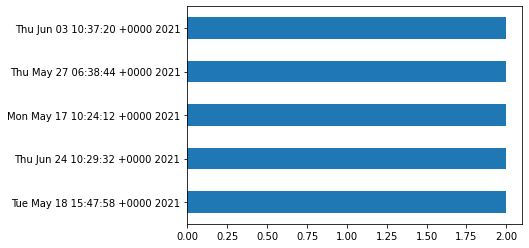

In [ ]:
#df['created_at'].value_counts().head(10)
%matplotlib inline
df['created_at'].value_counts().head(5).sort_values().plot(kind='barh')

**ΑΝΑΛΥΣΗ ΣΥΝΑΙΣΘΗΜΑΤΩΝ ΑΠΟ ΤΟ ΛΟΓΑΡΙΑΣΜΟ ΣΤΟ TWITTER ΤΗΣ GREENPEACE**

In [ ]:
!python -m spacy download el_core_news_md

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_md')


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
tweets_df.head(15)

created_at  ...  retweeted_status
0   Sat Jul 03 10:02:30 +0000 2021  ...               NaN
1   Sat Jul 03 08:00:07 +0000 2021  ...               NaN
2   Sat Jul 03 07:57:12 +0000 2021  ...               NaN
3   Sat Jul 03 06:24:15 +0000 2021  ...               NaN
4   Sat Jul 03 06:24:14 +0000 2021  ...               NaN
5   Fri Jul 02 10:41:50 +0000 2021  ...               NaN
6   Thu Jul 01 05:26:37 +0000 2021  ...               NaN
7   Thu Jul 01 05:26:36 +0000 2021  ...               NaN
8   Thu Jul 01 05:26:35 +0000 2021  ...               NaN
9   Thu Jul 01 05:26:34 +0000 2021  ...               NaN
10  Thu Jul 01 05:26:32 +0000 2021  ...               NaN
11  Thu Jul 01 05:26:27 +0000 2021  ...               NaN
12  Thu Jul 01 05:26:24 +0000 2021  ...               NaN
13  Wed Jun 30 08:20:17 +0000 2021  ...               NaN
14  Wed Jun 30 08:20:16 +0000 2021  ...               NaN

[15 rows x 31 columns]

In [ ]:
short_tweets = tweets_df[['created_at','full_text' ]]
short_tweets = short_tweets.rename(columns={'created_at': 'date', 'text': 'text'} )

In [ ]:
short_tweets.head()


date                                          full_text
0  Sat Jul 03 10:02:30 +0000 2021  Πόσα τέτοια “ατυχήματα” ακόμη;\n\nΚάποιοι στην...
1  Sat Jul 03 08:00:07 +0000 2021  Το ατύχημα στον αγωγό εξόρυξης ορυκτού αερίου ...
2  Sat Jul 03 07:57:12 +0000 2021  Διαρροή σε υποθαλάσσιο αγωγό εξόρυξης ορυκτού ...
3  Sat Jul 03 06:24:15 +0000 2021  Για να συνεχίσουμε στην σωστή κατεύθυνση όμως,...
4  Sat Jul 03 06:24:14 +0000 2021  Από σήμερα καταργούνται στην ΕΕ 10 κοινά πλαστ...

In [ ]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')
short_tweets.dtypes

date         datetime64[ns]
full_text            object
dtype: object

In [ ]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day

In [ ]:
short_tweets['full_text'] = short_tweets['full_text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

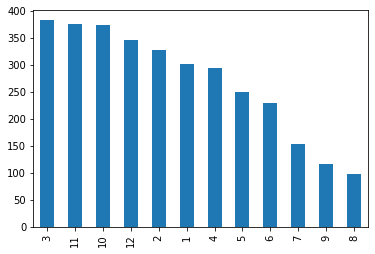

In [ ]:
short_tweets['month'].value_counts().plot(kind='bar')


In [ ]:
short_tweets[short_tweets['month']==2020]['full_text']

Series([], Name: full_text, dtype: object)

In [ ]:
text = short_tweets['full_text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')


In [ ]:
text

0       Ποσα τετοια “ατυχηματα” ακομη;\n\nΚαποιοι στην...
1       Το ατυχημα στον αγωγο εξορυξης ορυκτου αεριου ...
2       Διαρροη σε υποθαλασσιο αγωγο εξορυξης ορυκτου ...
3       Για να συνεχισουμε στην σωστη κατευθυνση ομως,...
4       Απο σημερα καταργουνται στην ΕΕ 10 κοινα πλαστ...
                              ...                        
3244    Σημερα στην Ινδονησια, ακτιβιστες μας σταματησ...
3245    Έχεις ακουσει οτι μειωνεται ο πληθυσμος των με...
3246    Οι ανθρωποι της Ηπειρου αντιστεκονται στις εξο...
3247    Η αξιοποιηση του ηλιου ειναι η λυση για την εν...
3248    RT @Greenpeace: What happens in the Arctic aff...
Name: full_text, Length: 3249, dtype: object

In [ ]:
text = short_tweets[short_tweets['year']==2021]['full_text'].str.cat(sep = ' ').replace("amp", ' ')
text

'Πόσα τέτοια “ατυχήματα” ακόμη;\n\nΚάποιοι στην Ελλάδα ακόμη ονειρεύονται εξορύξεις ορυκτών καυσίμων.⛔\n\nΑκύρωση ΑΜΕΣΑ κάθε σχεδίου εξόρυξης υδρογονανθράκων νότια της Κρήτης!\n\n#BreakFreeFromFossilFuels   Το ατύχημα στον αγωγό εξόρυξης ορυκτού αερίου στον Κόλπο του Μεξικού δείχνει για άλλη μία φορά τον κίνδυνο που έχουν τα ορυκτά καύσιμα για το περιβάλλον και τον άνθρωπο.\n\n#FossilFreeRevolution #BreakFreeFromFossilFuels   Διαρροή σε υποθαλάσσιο αγωγό εξόρυξης ορυκτού αερίου στον Κόλπο του Μεξικού προκάλεσε πυρκαγιά στον ωκεανό! 😱\n\nΑυτά συμβαίνουν όταν είμαστε εξαρτημένοι από τα ορυκτά καύσιμα. \n\nΕίναι ώρα για απεξάρτηση και στροφή σε ανανεώσιμες πηγές ενέργειας!\n\n#BreakFreeFromFossilFuels   Για να συνεχίσουμε στην σωστή κατεύθυνση όμως, πρέπει πρωτιστώς οι εταιρείες και εμείς οι ίδιοι να αλλάξουμε. #BreakFreeFromPlastic #Greenpeace\n\nΔες πώς εδώ:   Από σήμερα καταργούνται στην ΕΕ 10 κοινά πλαστικά προϊόντα μίας χρήσης, όπως μαχαιροπίρουνα, πιάτα και καλαμάκια. Είναι ένα καλό

In [ ]:
tweet = text


TextBlob(tweet).sentiment

Sentiment(polarity=0.12383237857107518, subjectivity=0.4253594042773149)

WORDCLOUD

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
stopwords = set(STOPWORDS) 
list(STOPWORDS)[0:10]

['i',
 'or',
 'your',
 'than',
 "he's",
 "i've",
 'yours',
 'few',
 "doesn't",
 "hasn't"]

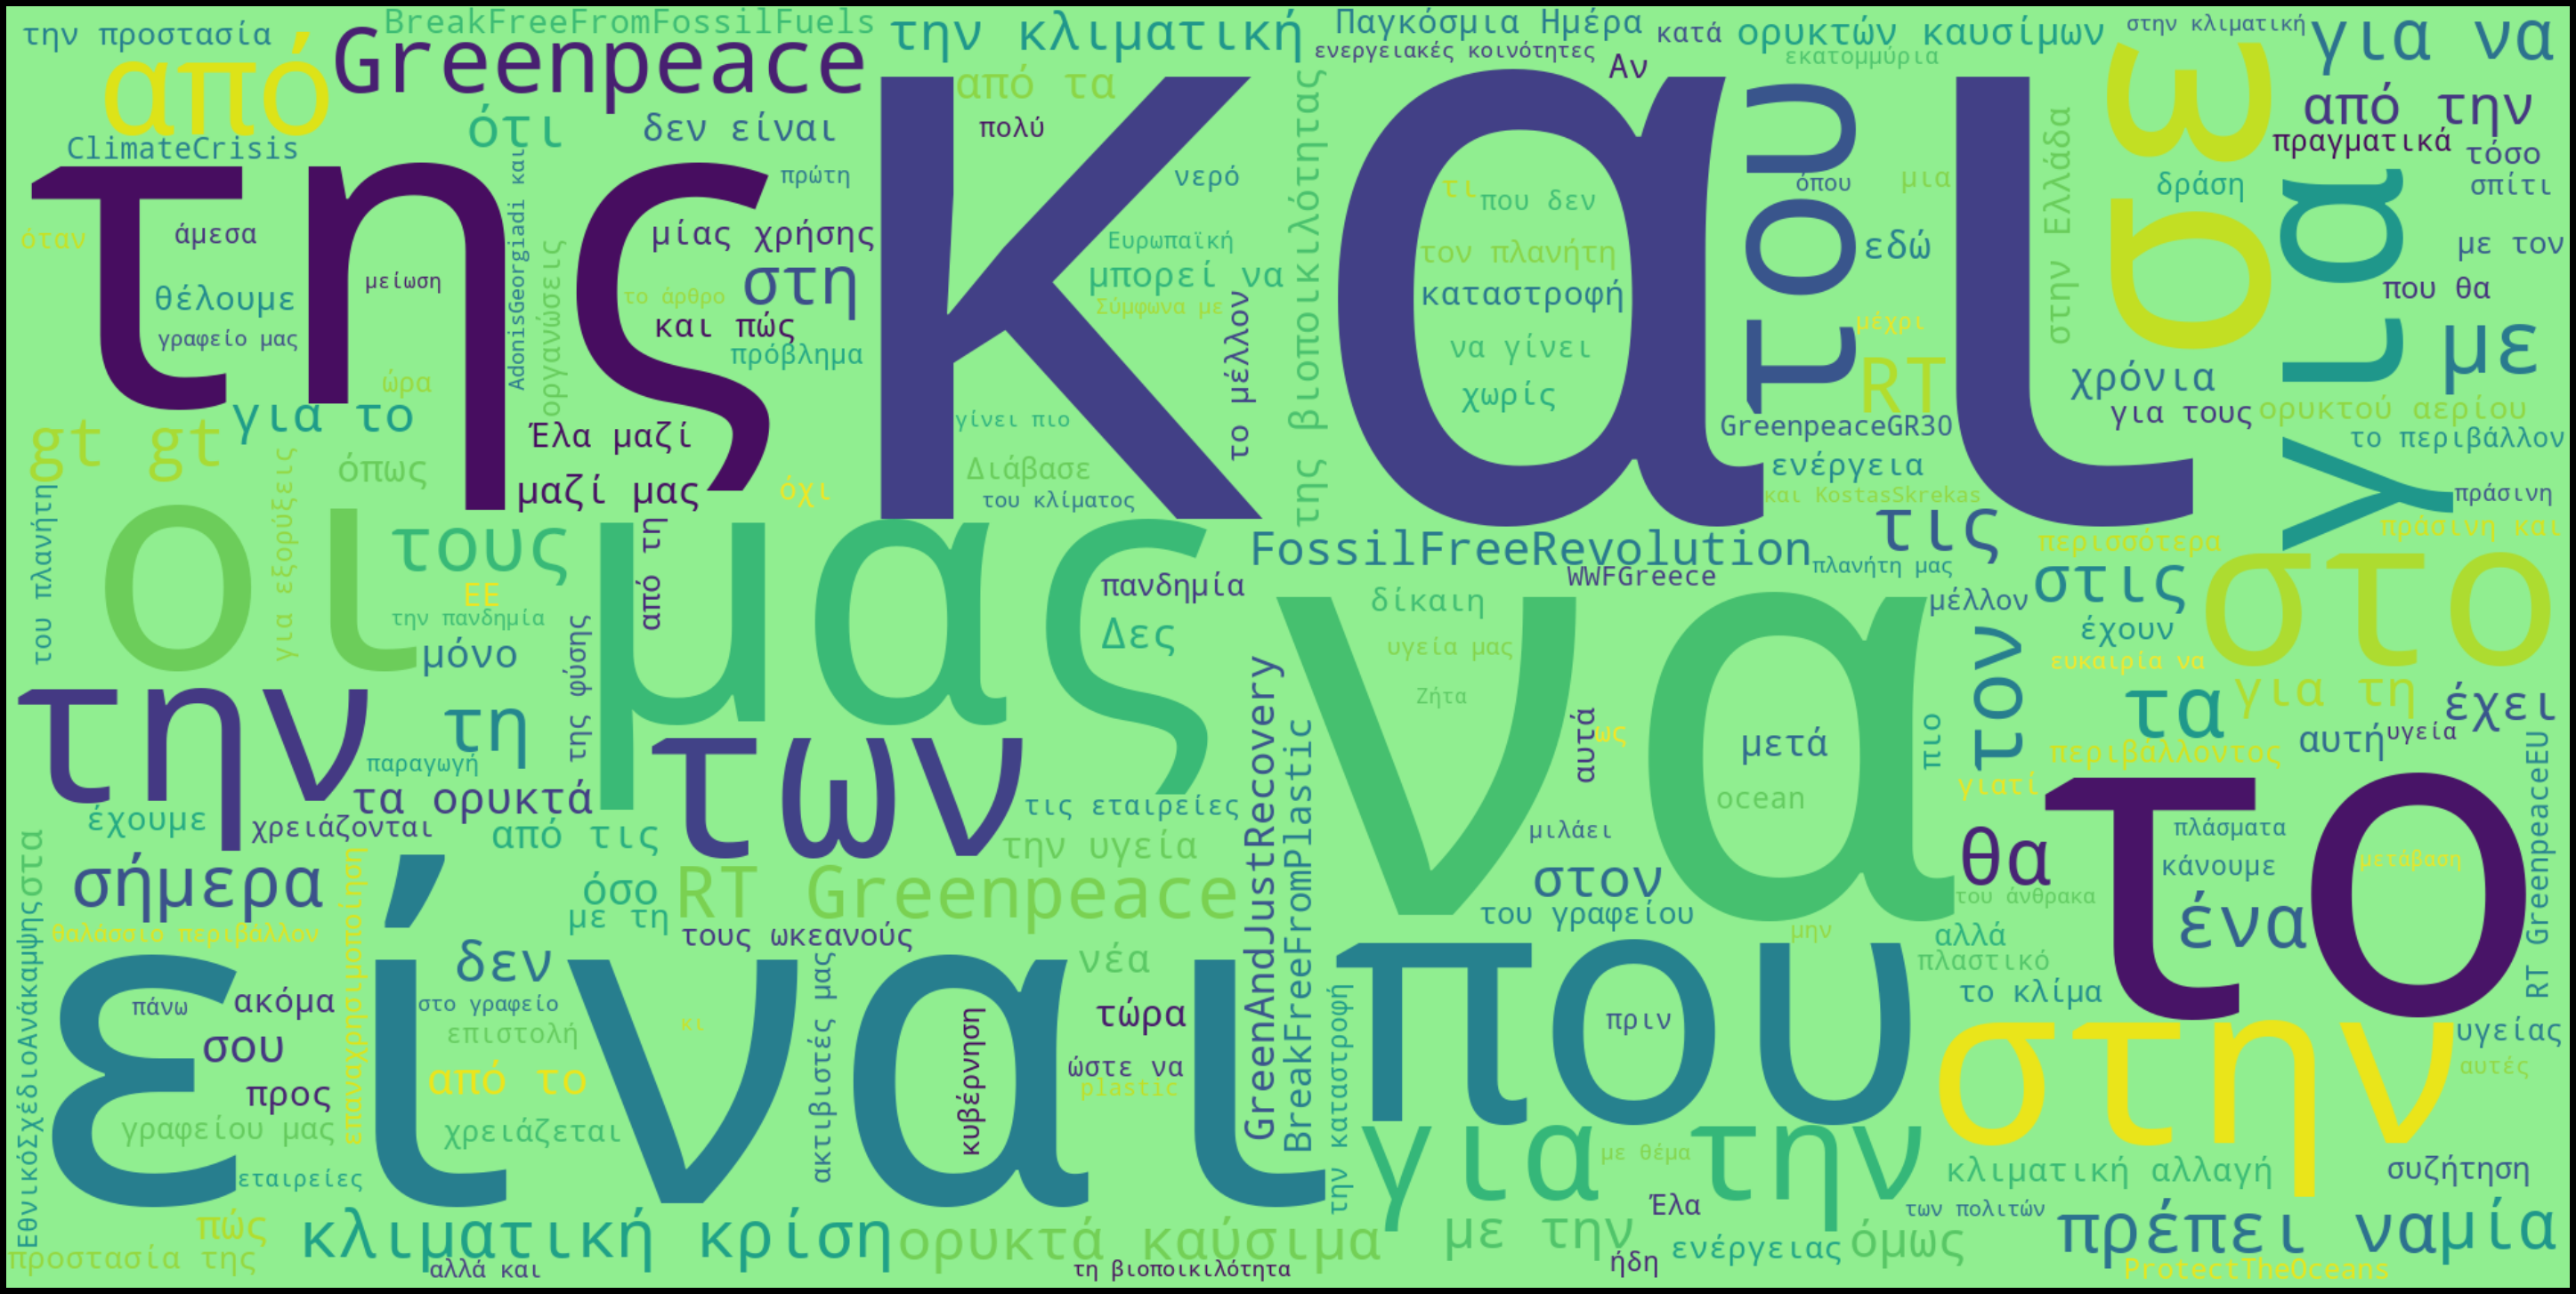

In [ ]:
wordcloud = WordCloud(stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'lightgreen'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

text = text.replace('RT', " ")
text = text.replace('whoemro', " ")
text = text.replace('edros', " ")
text = text.replace('whowpro', " ")
text = text.replace('whosearo', " ")
text = text.replace('WHOSEARO', " ")
text = text.replace('https', " ")
text = text.replace('DrTedros'," ")
text = text.replace('DrT'," ")
text = text.replace('Dr T'," ")

**Eισαγωγή ελληνικού λεξικού**

In [ ]:

!python -m spacy download el_core_news_md

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_md')


In [ ]:
import spacy
from spacy import displacy
import pandas as pd
from collections import defaultdict
import operator

In [ ]:
indexes = {}
df = pd.read_csv('https://raw.githubusercontent.com/cmourlas/DataAnalysisPython/master/lexicons/greek_sentiment_lexicon.tsv',sep='\t')
df = df.fillna('N/A')

In [ ]:
for index, row in df.iterrows():
    df.at[index, "Term"] = row["Term"].split(' ')[0]
    indexes[df.at[index, "Term"]] = index

In [ ]:
text= short_tweets['full_text'].str.cat(sep = ' ').replace("amp", ' ')

text

'Πόσα τέτοια “ατυχήματα” ακόμη;\n\nΚάποιοι στην Ελλάδα ακόμη ονειρεύονται εξορύξεις ορυκτών καυσίμων.⛔\n\nΑκύρωση ΑΜΕΣΑ κάθε σχεδίου εξόρυξης υδρογονανθράκων νότια της Κρήτης!\n\n#BreakFreeFromFossilFuels   Το ατύχημα στον αγωγό εξόρυξης ορυκτού αερίου στον Κόλπο του Μεξικού δείχνει για άλλη μία φορά τον κίνδυνο που έχουν τα ορυκτά καύσιμα για το περιβάλλον και τον άνθρωπο.\n\n#FossilFreeRevolution #BreakFreeFromFossilFuels   Διαρροή σε υποθαλάσσιο αγωγό εξόρυξης ορυκτού αερίου στον Κόλπο του Μεξικού προκάλεσε πυρκαγιά στον ωκεανό! 😱\n\nΑυτά συμβαίνουν όταν είμαστε εξαρτημένοι από τα ορυκτά καύσιμα. \n\nΕίναι ώρα για απεξάρτηση και στροφή σε ανανεώσιμες πηγές ενέργειας!\n\n#BreakFreeFromFossilFuels   Για να συνεχίσουμε στην σωστή κατεύθυνση όμως, πρέπει πρωτιστώς οι εταιρείες και εμείς οι ίδιοι να αλλάξουμε. #BreakFreeFromPlastic #Greenpeace\n\nΔες πώς εδώ:   Από σήμερα καταργούνται στην ΕΕ 10 κοινά πλαστικά προϊόντα μίας χρήσης, όπως μαχαιροπίρουνα, πιάτα και καλαμάκια. Είναι ένα καλό